<a href="https://colab.research.google.com/github/JosephHobbs9292/Project2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report,recall_score)

## Set global scikit-learn configuration 
from sklearn import set_config

In [ ]:
## Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning
---

In [ ]:
## Loading in the data set
df_heart = pd.read_csv("/content/heart.csv")
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
## Checking for missing values
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
## Examing data for impossible values 
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
## There are no duplicate rows to contend with
df_heart.duplicated().sum()

0

In [ ]:
## Displaying value counts for age column
df_heart["Age"].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
## Displaying value counts for RestingBP column
df_heart["RestingBP"].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
## Displaying value counts for Cholesterol column
df_heart["Cholesterol"].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
## Displaying value counts for FastingBS column
df_heart["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
## Displaying value counts for MaxHR column
df_heart["MaxHR"].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

In [ ]:
## Displaying value counts for Oldpeak column
df_heart["Oldpeak"].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

In [ ]:
## Displaying value counts for Oldpeak column
df_heart["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Data Visualization of All Features and Target
---

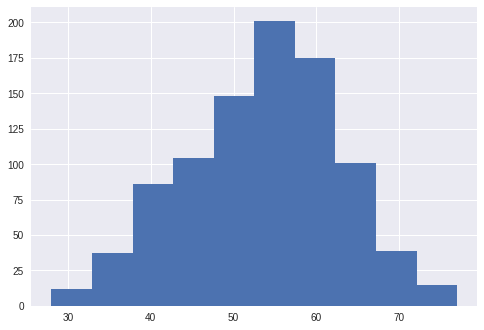

In [ ]:
## Data visualization of age feature
plt.style.use('seaborn')
df_heart["Age"].hist();

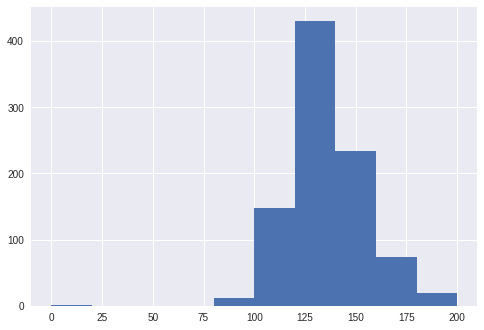

In [ ]:
## Data visualization of RestingBP feature
plt.style.use('seaborn')
df_heart["RestingBP"].hist();

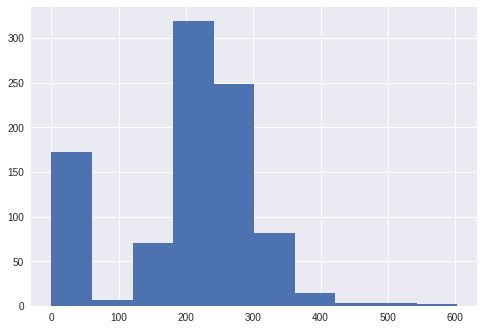

In [ ]:
## Data visualization of Cholesterol feature
plt.style.use('seaborn')
df_heart["Cholesterol"].hist();

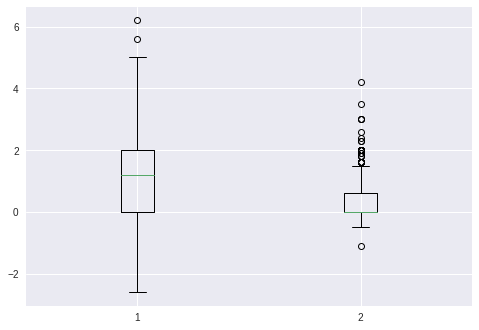

In [ ]:
positive = df_heart.loc[df_heart["HeartDisease"] == 1, "Oldpeak"].values
negative= df_heart.loc[df_heart["HeartDisease"] == 0, "Oldpeak"].values

plt.boxplot([positive, negative]);

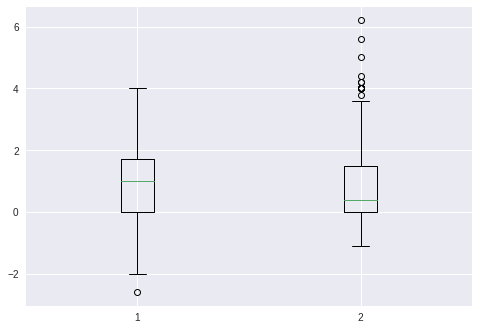

In [ ]:
## Data visualization of FastingBS feature
positive_Fasting = df_heart.loc[df_heart["FastingBS"] == 1, "Oldpeak"].values
negative_fasting = df_heart.loc[df_heart["FastingBS"] == 0, "Oldpeak"].values

plt.boxplot([positive_Fasting, negative_fasting]);

## Correlation Discovery
---

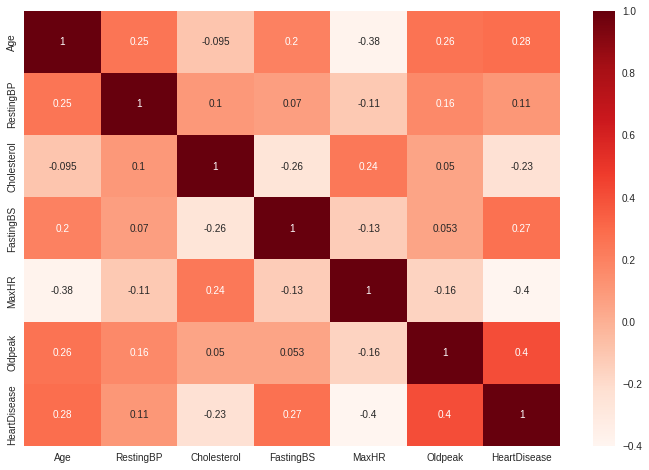

In [ ]:
## Exploring correlations using a heatmap
plt.style.use('seaborn')
corr = df_heart.corr()
fig, ax = plt.subplots(figsize =(12,8))
sns.heatmap(corr, cmap = "Reds", annot = True);

## Results
---
There is a some positive correlation between Oldpeak and our target heart disease (0.4). There is also some negative correlation between MaxHR and our heart disease (-0.4). There was also a small correlation between age and heart disease.

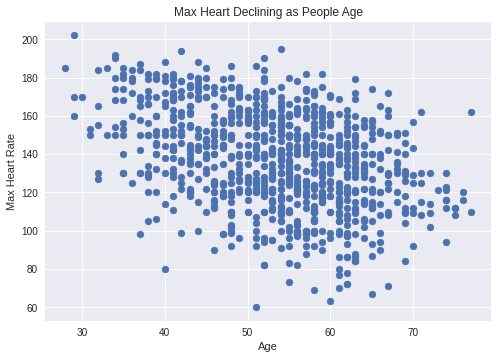

In [ ]:
## Trend Analysis
fix, ax = plt.subplots()
ax.scatter(df_heart["Age"], df_heart["MaxHR"]);
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.title("Max Heart Declining as People Age");


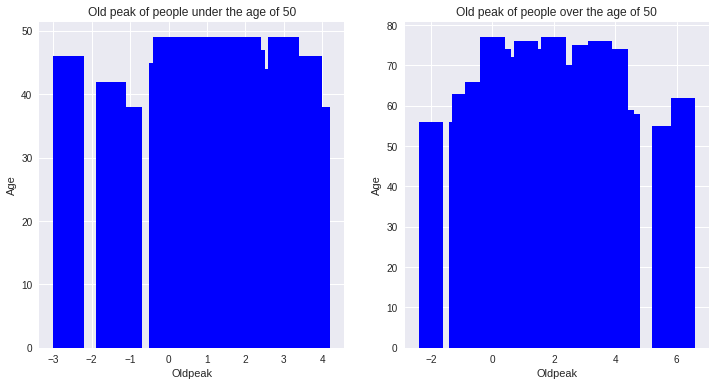

In [84]:
## Trend Analysis
over50 = df_heart["Age"] > 50
under50 = df_heart["Age"] < 50
df_over50 = df_heart[over50]
df_under50 = df_heart[under50]
fig, axes = plt.subplots(ncols = 2, figsize = (12, 6))

axes[0].bar(df_under50["Oldpeak"], df_under50["Age"], color = "blue");
axes[0].set_title("Old peak of people under the age of 50");
axes[0].set_xlabel("Oldpeak");
axes[0].set_ylabel("Age");

axes[1].bar(df_over50["Oldpeak"], df_over50["Age"], color = "blue");
axes[1].set_title("Old peak of people over the age of 50");
axes[1].set_xlabel("Oldpeak");
axes[1].set_ylabel("Age");

In [77]:
print(over50)

0      False
1      False
2      False
3      False
4       True
       ...  
913    False
914     True
915     True
916     True
917    False
Name: Age, Length: 918, dtype: bool


## Data Preprocessing
---


In [ ]:
## Spliting the data and running the train test split
target = "HeartDisease"
X = df_heart.drop(columns=target)
y = df_heart[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## Organizing Columns 
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
nominal_columns = ["Oldpeak"]

In [ ]:
## Creating Transformers 
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [ ]:
## Creating Tuples for Preprocessor
numerical_tuple = (scaler, numerical_columns)
nominal_tuple = (ohe, nominal_columns)

In [ ]:
## Creating preprocessor
preprocessor = make_column_transformer(numerical_tuple, nominal_tuple, remainder='drop')
preprocessor.fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Oldpeak'])])

In [ ]:
## Creating PCA with 95% variance
pca = PCA(n_components =.95)

## Logistic Regression Model
---

In [ ]:
## Creating baseline Logistic Regression Model 
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Oldpeak'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
## Printing scores of baseline model
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.7790697674418605
0.7652173913043478


In [ ]:
## GridsearchCV to tune model 
log_param = {"logisticregression__C" : [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], "logisticregression__penalty" : ["l1", "l2"]}
logreg_gridsearch = GridSearchCV(logreg_pipe, log_param)

In [ ]:
## Fitting model with gridsearch
logreg_gridsearch.fit(X_train, y_train)
logreg_gridsearch.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}

In [ ]:
## Creating tuned Logistic Regression Model
logreg_tuned = LogisticRegression(C = 0.01, penalty = "l2")
logreg_pipe_tuned = make_pipeline(preprocessor, logreg_tuned)
logreg_pipe_tuned.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Oldpeak'])])),
                ('logisticregression', LogisticRegression(C=0.01))])

In [ ]:
## Printing scores of tuned model
print(logreg_pipe_tuned.score(X_train, y_train))
print(logreg_pipe_tuned.score(X_test, y_test))

0.7688953488372093
0.7347826086956522


In [ ]:
## Creating tuned Logistic Regression Model with PCA
logreg_pca = LogisticRegression(C = 0.01, penalty = "l2")
logreg_pipe_pca = make_pipeline(preprocessor, pca, logreg_pca)
logreg_pipe_pca.fit(X_train, y_train)
logreg_predict_pca = logreg_pipe_pca.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
## Printing scores of tuned model with PCA
print(logreg_pipe_pca.score(X_train, y_train))
print(logreg_pipe_pca.score(X_test, y_test))

0.7688953488372093
0.7347826086956522


In [ ]:
## Tuned classification report with PCA
print(classification_report(y_test, logreg_predict_pca))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        98
           1       0.76      0.78      0.77       132

    accuracy                           0.73       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.73      0.73      0.73       230



## Decision Tree Model
---


In [ ]:
## Creating baseline Random Forest Model
dt =  DecisionTreeClassifier()
dt_pipe = make_pipeline(preprocessor, dt)
dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
## Printing scores of baseline model
print(dt_pipe.score(X_train, y_train))
print(dt_pipe.score(X_test, y_test))

1.0
0.6782608695652174


In [ ]:
## GridsearchCV to tune model
param_dt = {'decisiontreeclassifier__max_depth': [1,2,3],
              'decisiontreeclassifier__min_samples_leaf': [3,15,20],
              'decisiontreeclassifier__min_samples_split': [2, 10, 100]}
dt_search = GridSearchCV(dt_pipe, param_dt)

In [ ]:
## Fitting and getting the best params
dt_search.fit(X_train, y_train)
dt_search.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 2}

In [ ]:
## Creating tuned Decision Tree Model
dt_tuned =  DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 3, min_samples_split =2)
dt_pipe_tuned = make_pipeline(preprocessor, dt)
dt_pipe_tuned.fit(X_train, y_train)
dt_tuned_predictions = dt_pipe_tuned.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
## Printing scores of tuned model
print(dt_pipe_tuned.score(X_train, y_train))
print(dt_pipe_tuned.score(X_test, y_test))

1.0
0.6869565217391305


In [ ]:
## Tuned classification report
print(classification_report(y_test, dt_tuned_predictions))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        98
           1       0.75      0.68      0.71       132

    accuracy                           0.69       230
   macro avg       0.68      0.69      0.68       230
weighted avg       0.69      0.69      0.69       230



In [ ]:
## Creating tuned Decision Tree Model with PCA
dt_pca = DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 3, min_samples_split =2)
dt_pipe_pca = make_pipeline(preprocessor, pca, dt)
dt_pipe_pca.fit(X_train, y_train)
dt_pipe_pca_predictions = dt_pipe_pca.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
## Printing scores of tuned model with PCA
print(dt_pipe_pca.score(X_train, y_train))
print(dt_pipe_pca.score(X_test, y_test))

1.0
0.7043478260869566


In [ ]:
## Tuned classification report with PCA
print(classification_report(y_test, dt_pipe_pca_predictions))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        98
           1       0.77      0.70      0.73       132

    accuracy                           0.70       230
   macro avg       0.70      0.71      0.70       230
weighted avg       0.71      0.70      0.71       230

